# INTERACTING CASE

In [1]:
# executeme

using NBInclude
@nbinclude("Hofstadter Single Particle in Julia.ipynb")

In [2]:
using QuantumOptics

In [3]:
# Nx = 3; Ny = 3; N=Nx*Ny; q = 3; alpha=1/q
# PN = 2
# U = 2;

# Nx = 4; Ny = 4; N=Nx*Ny; q = Ny; alpha=1/q
# PN = 2
# U = 2;

# Nx = 4; Ny = 2; N=Nx*Ny; q=Ny; alpha=1/q
# PN = 2
# U = 2
# TSize = 15;

# Proj. yapmadan bunu hesaplamanın yöntemi yok! 88k state geliyor :D
# Nx = 8; Ny = 10; N=Nx*Ny; q = Ny; alpha=1/q
# PN = 3
# U = 2;

In [4]:
# executeme

function get_Bosonic_MB_Basis(N,PN)
   
    NBasis = NLevelBasis(N)
    NStates = bosonstates(NBasis, PN)
    
    NBasis_MB = ManyBodyBasis(NBasis, NStates)
    
    return NBasis_MB, NBasis
end

get_Bosonic_MB_Basis (generic function with 1 method)

In [6]:
basis_mb, basis = get_Bosonic_MB_Basis(N,PN)

UndefVarError: UndefVarError: `N` not defined

In [7]:
# executeme

function get_Kinetic_Part(N, MB_Basis, Sp_Op)
    KT = SparseOperator(MB_Basis)
    for m in 1:N
        for n in 1:N
            KT = KT + Sp_Op[m,n] * transition(MB_Basis, m, n)
        end
    end
    
    return KT
end

get_Kinetic_Part (generic function with 1 method)

In [8]:
basis2 = basis ⊗ basis

# interaction : at_i at_i a_i a_i = at_i a_i at_i a_i - at_i a_i = n_i n_i - n_i
    
Vint2 = SparseOperator(basis2)

for n in 1:N
    Vint2 += U/2*transition(basis,n,n)⊗transition(basis,n,n)
end

Vint_mb = manybodyoperator(basis_mb, Vint2)

MethodError: MethodError: no method matching tensor(::typeof(basis), ::typeof(basis))

In [9]:
# executeme

function get_Int_Part(N, MB_Basis, U)
    IT = SparseOperator(MB_Basis)
    for m in 1:N
        IT = IT + U/2 * number(MB_Basis, m) * ( number(MB_Basis, m) - identityoperator(MB_Basis) ) 
    end
    
    return IT
end

get_Int_Part (generic function with 1 method)

In [10]:
Int_mb = get_Int_Part(N, basis_mb, U)

UndefVarError: UndefVarError: `N` not defined

In [11]:
# executeme

function Hofstadter_Finite_U(Nx, Ny, alpha, PN, U)
    
    N = Nx*Ny
    
    MB_Basis, Basis = get_Bosonic_MB_Basis(N,PN)
    
    Sp_Op = Hofstadter_SP(Nx, Ny, alpha, 0)
    Kin = get_Kinetic_Part(N, MB_Basis, Sp_Op)
    
    Int = get_Int_Part(N, MB_Basis, U)
    
    H = Kin + Int
    
    return H
end

Hofstadter_Finite_U (generic function with 1 method)

1) If particle number=1 and U=0, Hofstadter Finite U energies has to be equal to Hofstadter Single Particle energies.

In [14]:
U=0
H_mb = Hofstadter_Finite_U(3, 3, 1/3, 2, U);

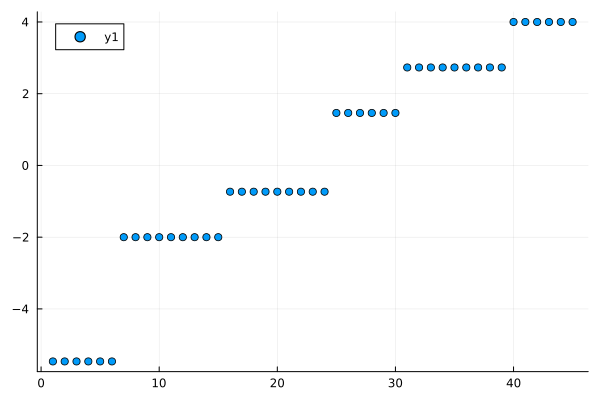

In [15]:
using Plots
scatter(eigenenergies(dense(H_mb)))

In [16]:
eigenenergies(dense(Hofstadter_Finite_U(Nx,Ny,1/q,PN,U)))

UndefVarError: UndefVarError: `Nx` not defined

In [17]:
using LinearAlgebra
eigen(Hofstadter_SP(4, 4, 1/4, 0))

Eigen{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
values:
16-element Vector{Float64}:
 -2.8284271247461885
 -2.8284271247461876
 -2.8284271247461876
 -2.828427124746186
  8.286059959166441e-18
  4.0585163780574196e-17
  4.1346995109779074e-17
  1.6695453646404193e-16
  2.6645352591003757e-15
  3.1086244689504383e-15
  3.552713678800501e-15
  3.9968028886505635e-15
  2.8284271247461894
  2.82842712474619
  2.8284271247461903
  2.828427124746191
vectors:
16×16 Matrix{ComplexF64}:
   0.253802-0.342766im    -0.0562206-0.00650238im  …     0.253802-0.342766im
   0.267986-0.358671im    -0.0592794-0.179842im         -0.267986+0.358671im
   0.106323-0.329047im      0.214893-0.22892im           0.106323-0.329047im
   0.122473-0.289664im      0.134735+0.0126188im        -0.122473+0.289664im
   0.129198-0.233333im     -0.213467+0.171423im         -0.129198+0.233333im
   0.205786-0.0975906im    -0.274378-0.272181im    …     0.205786-0.0975906im
 -0.0103629-0.0684193im     0.362407-0.3

In [18]:
function get_Fermionic_MB_Basis(N,PN)
    b_hard = NLevelBasis(N)
    states_hard = fermionstates(b_hard, [PN])
    b_mb_hard = ManyBodyBasis(b_hard, states_hard)
    
    return b_mb_hard
end

get_Fermionic_MB_Basis (generic function with 1 method)

In [19]:
function Hofstadter_Hard_Core(Nx, Ny, alpha, PN, U)
    
    N = Nx*Ny
    
    MB_Basis = get_Fermionic_MB_Basis(N,PN)
    
    Sp_Op = Hofstadter_SP(Nx, Ny, alpha, 0)
    Kin = get_Kinetic_Part(N, MB_Basis, Sp_Op)
    
    Int = get_Int_Part(N, MB_Basis, U)
    
    H = Kin + Int
    
    return H
end

Hofstadter_Hard_Core (generic function with 1 method)

If U>>1, Hofstadter Finite U energies converges at Hofstadter Hard Core energies.

In [24]:
Nx = 4; Ny = 4; N=Nx*Ny; q = 2; alpha=1/q
PN = 2

2

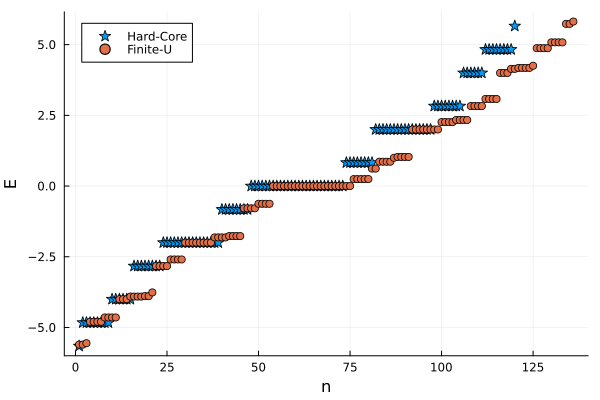

In [26]:
using Plots

U = 1

E1 = eigenenergies(dense(Hofstadter_Hard_Core(Nx, Ny, alpha, PN, U)))
E2 = eigenenergies(dense(Hofstadter_Finite_U(Nx, Ny, alpha, PN, U)))

plot(1:length(E1), E1, seriestype=:scatter, markershape=:star5, markersize=6, label="Hard-Core")
plot!(1:length(E2), E2, seriestype=:scatter, label="Finite-U")

xlabel!("n");ylabel!("E")

In [70]:
E2

36-element Vector{Float64}:
  -4.291984549541244
  -4.023269983380721
  -4.023269983380696
  -2.270601696135735
  -2.270601696135729
  -2.019700134291128
  -1.640815769922527
  -1.640815769922519
  -1.3332580083629504
  -0.548311496926755
  -0.5483114969267407
  -0.07993610219565705
  -0.03998401278722959
   ⋮
   2.234112763318398
   3.968629458234168
   3.968629458234212
   4.249828734308193
 100.01528221904816
 100.01528221904822
 100.03998401278724
 100.03999999360515
 100.07993610219566
 100.08001598715141
 100.10471771386192
 100.10471771386203

# CHERN (INTERACTING CASE)

In [52]:
@nbinclude("Hofstadter Single Particle in Theta Space.ipynb")

n1 = 1
n2 = 2

function Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx, Ty, PN, U)
    
    N = Nx*Ny
    
    MB_Basis, Basis = get_Bosonic_MB_Basis(N,PN)
    
    Sp_Op = HSP_T(Nx, Ny, alpha, Tx, Ty, 0)
    Kin = get_Kinetic_Part(N, MB_Basis, Sp_Op)
    
    Int = get_Int_Part(N, MB_Basis, U)
    
    H = Kin + Int
    
    return H
end

# Twist Angle Parameter Space #
dx=2*pi/TSize
dy=dx
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy))
# ---- #

# Link Variable and Berry Curvature #
Sum=0
for tx in range(start=1, stop=length(Tx))
    for ty in range(start=1, stop=length(Ty))
        
        H_mb = Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx[tx], Ty[ty], PN, U)
        w1, v1 = eigen(dense(H_mb).data)
        # i = sortperm(w1, by=real);w1 = w1[i];v1 = v1[:,i]
        v1 = v1[:,n1:n2]  
        #------------------------------------
        H_mb = Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx[tx]+dx, Ty[ty], PN, U)
        w2, v2 = eigen(dense(H_mb).data)
        #i = sortperm(w2, by=real);w2 = w2[i];v2 = v2[:,i]
        v2 = v2[:,n1:n2]
        #------------------------------------
        H_mb = Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx[tx], Ty[ty]+dy, PN, U)
        w3, v3 = eigen(dense(H_mb).data)
        #i = sortperm(w3, by=real);w3 = w3[i];v3 = v3[:,i]
        v3 = v3[:,n1:n2]
        #------------------------------------
        H_mb = Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx[tx]+dx, Ty[ty]+dy, PN, U)
        w4, v4 = eigen(dense(H_mb).data)
        #i = sortperm(w4, by=real);w4 = w4[i];v4 = v4[:,i]
        v4 = v4[:,n1:n2]
        #----------LINK VARIABLES------------
        U1=det(adjoint(v1)*v2)
        U1=U1/abs(U1)
        U2=det(adjoint(v2)*v4)
        U2=U2/abs(U2)
        U3=det(adjoint(v3)*v4)
        U3=U3/abs(U3)
        U4=det(adjoint(v1)*v3)
        U4=U4/abs(U4)
        #----------BERRY CURVATURE-----------
        F=log(U1*U2*1/U3*1/U4)
        Sum=Sum+F 
    end
end
# ---- #

print("Chern Number is: ", 1/(2*pi*1im)*Sum)

Chern Number is: 3.9999999999944635 + 4.60406157301334e-16im

In [48]:
U = 2
PN = 2
H_Finite = Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx[2], Ty[2], PN, U)
Ee, Uu = eigenenergies(dense(H_Finite ))

45-element Vector{Float64}:
 -5.244968906605933
 -5.244968906605926
 -5.244968906605921
 -4.974840172499153
 -4.9748401724991425
 -4.974840172499139
 -1.9720102603513892
 -1.972010260351389
 -1.9720102603513883
 -1.890449488035411
 -1.8904494880354106
 -1.8904494880354092
 -1.55948194474537
  ⋮
  3.3657376516283706
  3.3657376516283715
  3.365737651628373
  3.4551008923445496
  3.4551008923445523
  3.4551008923445545
  4.758323604041526
  4.758323604041532
  4.758323604041532
  4.818883774286787
  4.818883774286787
  4.818883774286793

In [ ]:
4
-3
6.0046910114196645
-6.9939547502816435
-3
4